# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [2]:
iris = load_iris()

In [3]:

df_features = pd.DataFrame(iris.data, columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns=["target"])

df = pd.concat([df_features, df_target], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [4]:
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_train)

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.
    

### To test different  and get the best among them

In [7]:
def build_model(optimizer):
  model = Sequential([
      Dense(6, input_dim=X_train_scaled.shape[1], activation="relu", kernel_initializer="uniform"),

      # Single hidden layer
      Dense(6, activation="relu"),

      Dense(pd.unique(y_train).shape[0], activation="softmax") # Number of neurons is 3
  ])

  model.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy", # Appropiate for this data label
                metrics=["accuracy"]
                )

  return model

In [8]:
# Build ANN model with "adam" optimizer
model = build_model("adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.
    

In [9]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5558 - loss: 1.0759
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6092 - loss: 1.0635 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7052 - loss: 1.0514
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6673 - loss: 1.0410 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6983 - loss: 1.0285  
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6769 - loss: 1.0198 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7452 - loss: 0.9980 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6931 - loss: 0.9947 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7538 - loss: 0.9660 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7581 - loss: 0.9607  


In [10]:

# Predict on the test set
y_pred = model.predict(X_test)

# Assuming y_pred contains the probability for each class
y_pred_class = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# # Classification Report
report = classification_report(y_test, y_pred_class, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Accuracy: 26.67%
Confusion Matrix:
[[ 0  0  8]
 [ 0  0 14]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         8
     Class 1       0.00      0.00      0.00        14
     Class 2       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - accuracy: 0.2667 - loss: 1.1262


[1.1262089014053345, 0.2666666805744171]

## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    

In [12]:
def build_better_model(optimizer, regularization):

  model = Sequential([
    Dense(16, input_dim=X_train_scaled.shape[1],
          activation="relu", kernel_initializer="uniform",
          kernel_regularizer=l2(regularization)
    ),

    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(32, activation="relu"),

    Dense(pd.unique(y_train).shape[0], activation="softmax")
])

  model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

  return model

In [13]:
optimizer = Adam(learning_rate=0.01)
regularization = 0.04

model = build_better_model(optimizer, regularization)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,915 (19.20 KB)

 Trainable params: 4,915 (19.20 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9363 - loss: 0.1336 - val_accuracy: 0.9583 - val_loss: 0.0964
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9822 - loss: 0.1079 - val_accuracy: 0.9167 - val_loss: 0.1954
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9173 - loss: 0.2039 - val_accuracy: 1.0000 - val_loss: 0.0797
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9942 - loss: 0.0711 - val_accuracy: 0.9583 - val_loss: 0.0779
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9754 - loss: 0.1311 - val_accuracy: 0.9167 - val_loss: 0.2637
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9256 - loss: 0.1910 - val_accuracy: 1.0000 - val_loss: 0.0909
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9672 - loss: 0.1195 - val_accuracy: 0.9583 - val_loss: 0.1018
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9399 - loss: 0.1428 - val_accuracy: 0.9583 - va


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


In [15]:

# Predict on the test set
y_pred = model.predict(X_test)

# Assuming y_pred contains the probability for each class
y_pred_class = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Accuracy: 100.00%
Confusion Matrix:
[[ 8  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualize training and validation loss

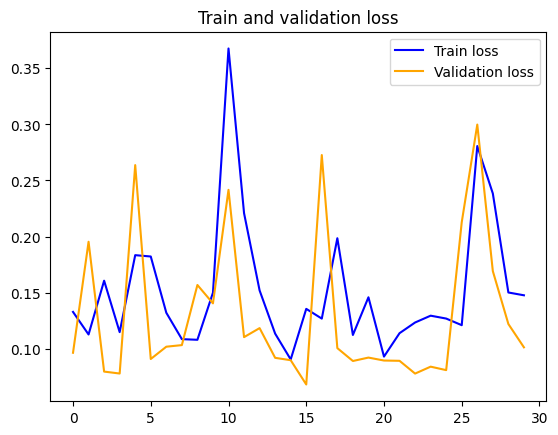

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(loss, color="blue", label="Train loss")
plt.plot(val_loss, color="orange", label="Validation loss")

plt.title("Train and validation loss")
plt.legend()

plt.show()

## Conclusion

**About the dataset**
  * I used iris dataset In this lab to experience with ANN. The dataset is about 150 entries with 5 columns, 4 features and 1 target.
  * The problem is a multi classification problem

**About the ANN structure**
* I started with a simple ANN structure and got a bad model result

* And then I refactored the structure to make the model prediction more accurate by:
  1. Adding more layers

  2. Adding extra number of neurons to capture patterns and make the model performance better
  
  3. Adding dropout layer to avoid making the model prone to overfitting
  
  4. Optimized the learning process using the Adam optimizer with a learning  
  rate of 0.01.
  
  5. Applied L2 regularization with a factor of 0.04 to further prevent overfitting.


**Conclusion & Comparison**

- **Model 1:**

  * Accuracy: 43.33%
  * Performance: The model did not make any correct prediction with Class 1. The precision and recall values are imbalanced, suggesting that the model is not effectively learning or distinguishing between the classes.



- **Model 2:**

  * Accuracy: 100%
  * Performance: The model correctly classifies all instances. The confusion matrix shows that the model can distinguish between classes with high precision and recall.
